In [2]:

#importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import xlrd
import pandas as pd
import datetime
import lifetimes
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions
from lifetimes.utils import calibration_and_holdout_data
from lifetimes.plotting import *
from sklearn.metrics import mean_squared_error
from math import sqrt
from lifetimes.plotting import plot_history_alive
import pickle
from lifetimes import ModifiedBetaGeoFitter
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "darkgrid")

In [3]:
# Load the file into a DataFrame
mc_kmeans_df = pd.read_csv('output_after_Kmeans.csv', encoding='ascii')

# Remove the 'Unnamed: 0' column
mc_kmeans_df.drop(columns=['Unnamed: 0'], inplace=True)

# Set 'CustomerID' as the index
mc_kmeans_df.set_index('CustomerID', inplace=True)

print(mc_kmeans_df.head())

            frequency  recency      T  monetary_value  predicted_purchases  \
CustomerID                                                                   
12346.0           6.0    196.0  360.0       47.143333             0.479169   
12745.0           1.0     88.0  209.0      266.930000             0.196193   
12747.0          15.0    363.0  367.0      313.325333             1.095849   
12748.0          95.0    370.0  370.0      238.513263             6.600607   
12749.0           2.0    122.0  156.0      986.790000             0.378669   

            actual_30     Error  p_not_alive  p_alive  Expected_Avg_Sales  \
CustomerID                                                                  
12346.0      0.918367  0.439199          0.0      1.0          111.008276   
12745.0      0.340909  0.144716          0.0      1.0          342.105393   
12747.0      1.239669  0.143821          0.0      1.0          320.276635   
12748.0      7.702703  1.102096          0.0      1.0          240.7

In [4]:
mc_kmeans_df.head()

,frequency,recency,T,monetary_value,predicted_purchases,actual_30,Error,p_not_alive,p_alive,Expected_Avg_Sales,predicted_clv,profit_margin,Lables_MBG_KMeans
CustomerID,,,,,,,,,,,,,
12346.0,6.0,196.0,360.0,47.143333,0.479169,0.918367,0.439199,0.0,1.0,111.008276,1390.448933,69.522447,0.0
12745.0,1.0,88.0,209.0,266.930000,0.196193,0.340909,0.144716,0.0,1.0,342.105393,1717.623313,85.881166,0.0
12747.0,15.0,363.0,367.0,313.325333,1.095849,1.239669,0.143821,0.0,1.0,320.276635,9236.027372,461.801369,0.0
12748.0,95.0,370.0,370.0,238.513263,6.600607,7.702703,1.102096,0.0,1.0,240.726907,41992.512150,2099.625608,0.0
12749.0,2.0,122.0,156.0,986.790000,0.378669,0.491803,0.113135,0.0,1.0,751.530019,7482.166344,374.108317,0.0


In [5]:
from scipy.stats import poisson

# Function to perform Monte Carlo Simulation for predicted purchases
def monte_carlo_simulation(predicted_purchases):
    # Simulate 1000 scenarios for predicted purchases over the next year
    simulations = poisson.rvs(mu=predicted_purchases, size=1000)
    # Calculate the average of the simulations
    return simulations.mean()

# Apply the Monte Carlo Simulation to the 'predicted_purchases' column
mc_kmeans_df['mc_predicted_purchases'] = mc_kmeans_df['predicted_purchases'].apply(monte_carlo_simulation)

print(mc_kmeans_df.head())

            frequency  recency      T  monetary_value  predicted_purchases  \
CustomerID                                                                   
12346.0           6.0    196.0  360.0       47.143333             0.479169   
12745.0           1.0     88.0  209.0      266.930000             0.196193   
12747.0          15.0    363.0  367.0      313.325333             1.095849   
12748.0          95.0    370.0  370.0      238.513263             6.600607   
12749.0           2.0    122.0  156.0      986.790000             0.378669   

            actual_30     Error  p_not_alive  p_alive  Expected_Avg_Sales  \
CustomerID                                                                  
12346.0      0.918367  0.439199          0.0      1.0          111.008276   
12745.0      0.340909  0.144716          0.0      1.0          342.105393   
12747.0      1.239669  0.143821          0.0      1.0          320.276635   
12748.0      7.702703  1.102096          0.0      1.0          240.7

In [6]:
mc_kmeans_df.head()

,frequency,recency,T,monetary_value,predicted_purchases,actual_30,Error,p_not_alive,p_alive,Expected_Avg_Sales,predicted_clv,profit_margin,Lables_MBG_KMeans,mc_predicted_purchases
CustomerID,,,,,,,,,,,,,,
12346.0,6.0,196.0,360.0,47.143333,0.479169,0.918367,0.439199,0.0,1.0,111.008276,1390.448933,69.522447,0.0,0.441
12745.0,1.0,88.0,209.0,266.930000,0.196193,0.340909,0.144716,0.0,1.0,342.105393,1717.623313,85.881166,0.0,0.215
12747.0,15.0,363.0,367.0,313.325333,1.095849,1.239669,0.143821,0.0,1.0,320.276635,9236.027372,461.801369,0.0,1.040
12748.0,95.0,370.0,370.0,238.513263,6.600607,7.702703,1.102096,0.0,1.0,240.726907,41992.512150,2099.625608,0.0,6.681
12749.0,2.0,122.0,156.0,986.790000,0.378669,0.491803,0.113135,0.0,1.0,751.530019,7482.166344,374.108317,0.0,0.414


In [7]:
mc_kmeans_df.to_csv('mc_kmeans_df_with_predictions.csv')

In [8]:
df = mc_kmeans_df

In [9]:
# make a new df kmeans_on_mc_df and include columns frequency, recency, T, monetary_value, p_alive_p_not_alive, expected_avg_sales, mc_predicted_purchases and apply k-means clustering on it. 
# It should have 4 clusters/labels. 

In [10]:
df.rename(columns={'Labels': 'Label_MBG'}, inplace=True)
#df.set_index('CustomerID', inplace=True)
# Show the head of the DataFrame to confirm changes
df.head()

,frequency,recency,T,monetary_value,predicted_purchases,actual_30,Error,p_not_alive,p_alive,Expected_Avg_Sales,predicted_clv,profit_margin,Lables_MBG_KMeans,mc_predicted_purchases
CustomerID,,,,,,,,,,,,,,
12346.0,6.0,196.0,360.0,47.143333,0.479169,0.918367,0.439199,0.0,1.0,111.008276,1390.448933,69.522447,0.0,0.441
12745.0,1.0,88.0,209.0,266.930000,0.196193,0.340909,0.144716,0.0,1.0,342.105393,1717.623313,85.881166,0.0,0.215
12747.0,15.0,363.0,367.0,313.325333,1.095849,1.239669,0.143821,0.0,1.0,320.276635,9236.027372,461.801369,0.0,1.040
12748.0,95.0,370.0,370.0,238.513263,6.600607,7.702703,1.102096,0.0,1.0,240.726907,41992.512150,2099.625608,0.0,6.681
12749.0,2.0,122.0,156.0,986.790000,0.378669,0.491803,0.113135,0.0,1.0,751.530019,7482.166344,374.108317,0.0,0.414


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2598 entries, 12346.0 to 18287.0
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   frequency               2598 non-null   float64
 1   recency                 2598 non-null   float64
 2   T                       2598 non-null   float64
 3   monetary_value          2598 non-null   float64
 4   predicted_purchases     2598 non-null   float64
 5   actual_30               2598 non-null   float64
 6   Error                   2598 non-null   float64
 7   p_not_alive             2598 non-null   float64
 8   p_alive                 2598 non-null   float64
 9   Expected_Avg_Sales      2598 non-null   float64
 10  predicted_clv           2598 non-null   float64
 11  profit_margin           2598 non-null   float64
 12  Lables_MBG_KMeans       1708 non-null   float64
 13  mc_predicted_purchases  2598 non-null   float64
dtypes: float64(14)
memory usage: 304.5 K

In [12]:
df.to_csv('mc_kmeans_df_with_predictions_1.csv')

In [13]:
from sklearn.cluster import KMeans

# Create a new DataFrame with selected columns
kmeans_on_mc_df = df[['frequency', 'recency', 'T', 'monetary_value', 'p_alive', 'Expected_Avg_Sales', 'mc_predicted_purchases']].copy()

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_on_mc_df['Labels_MC_sim'] = kmeans.fit_predict(kmeans_on_mc_df)

# Show the head of the new DataFrame and the counts of each label
kmeans_on_mc_df.head(), kmeans_on_mc_df['Labels_MC_sim'].value_counts()

(            frequency  recency      T  monetary_value  p_alive  \
 CustomerID                                                       
 12346.0           6.0    196.0  360.0       47.143333      1.0   
 12745.0           1.0     88.0  209.0      266.930000      1.0   
 12747.0          15.0    363.0  367.0      313.325333      1.0   
 12748.0          95.0    370.0  370.0      238.513263      1.0   
 12749.0           2.0    122.0  156.0      986.790000      1.0   
 
             Expected_Avg_Sales  mc_predicted_purchases  Labels_MC_sim  
 CustomerID                                                             
 12346.0             111.008276                   0.441              0  
 12745.0             342.105393                   0.215              0  
 12747.0             320.276635                   1.040              0  
 12748.0             240.726907                   6.681              0  
 12749.0             751.530019                   0.414              2  ,
 Labels_MC_sim
 0

In [14]:
kmeans_on_mc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2598 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   frequency               2598 non-null   float64
 1   recency                 2598 non-null   float64
 2   T                       2598 non-null   float64
 3   monetary_value          2598 non-null   float64
 4   p_alive                 2598 non-null   float64
 5   Expected_Avg_Sales      2598 non-null   float64
 6   mc_predicted_purchases  2598 non-null   float64
 7   Labels_MC_sim           2598 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 172.5 KB


In [15]:
kmeans_on_mc_df.head()

,frequency,recency,T,monetary_value,p_alive,Expected_Avg_Sales,mc_predicted_purchases,Labels_MC_sim
CustomerID,,,,,,,,
12346.0,6.0,196.0,360.0,47.143333,1.0,111.008276,0.441,0
12745.0,1.0,88.0,209.0,266.930000,1.0,342.105393,0.215,0
12747.0,15.0,363.0,367.0,313.325333,1.0,320.276635,1.040,0
12748.0,95.0,370.0,370.0,238.513263,1.0,240.726907,6.681,0
12749.0,2.0,122.0,156.0,986.790000,1.0,751.530019,0.414,2


In [16]:
# Calculate the mean of the clusters to understand their characteristics
cluster_characteristics = kmeans_on_mc_df.groupby('Labels_MC_sim').mean()
cluster_characteristics

,frequency,recency,T,monetary_value,p_alive,Expected_Avg_Sales,mc_predicted_purchases
Labels_MC_sim,,,,,,,
0,3.893281,191.583286,254.314512,232.678543,1.0,296.949000,0.449998
1,15.666667,262.416667,320.750000,3925.957328,1.0,3322.641128,1.230167
2,7.097561,247.634146,295.056911,1309.853507,1.0,1035.777056,0.617390
3,5.384393,239.319364,288.128613,563.263631,1.0,509.302087,0.511113


# The characteristics of the labels based on the mean values of the clusters are as follows:

## Label 0:

Moderate frequency of purchases
Recent interaction with the business
Moderate length of relationship with the business
Lower monetary value compared to other clusters
High probability of being alive
Moderate expected average sales
Moderate predicted purchases

## Label 1:

High frequency of purchases
Very recent interaction
Longest relationship with the business
Very high monetary value
High probability of being alive
Very high expected average sales
Highest predicted purchases

## Label 2:

Above moderate frequency of purchases
Recent interaction
Moderate length of relationship
High monetary value
High probability of being alive
High expected average sales
Above moderate predicted purchases

## Label 3:

Moderate frequency of purchases
Recent interaction
Moderate length of relationship
Moderate monetary value
High probability of being alive
Moderate expected average sales
Moderate predicted purchases
These clusters help in identifying different customer segments based on their purchasing behavior and engagement with the business.

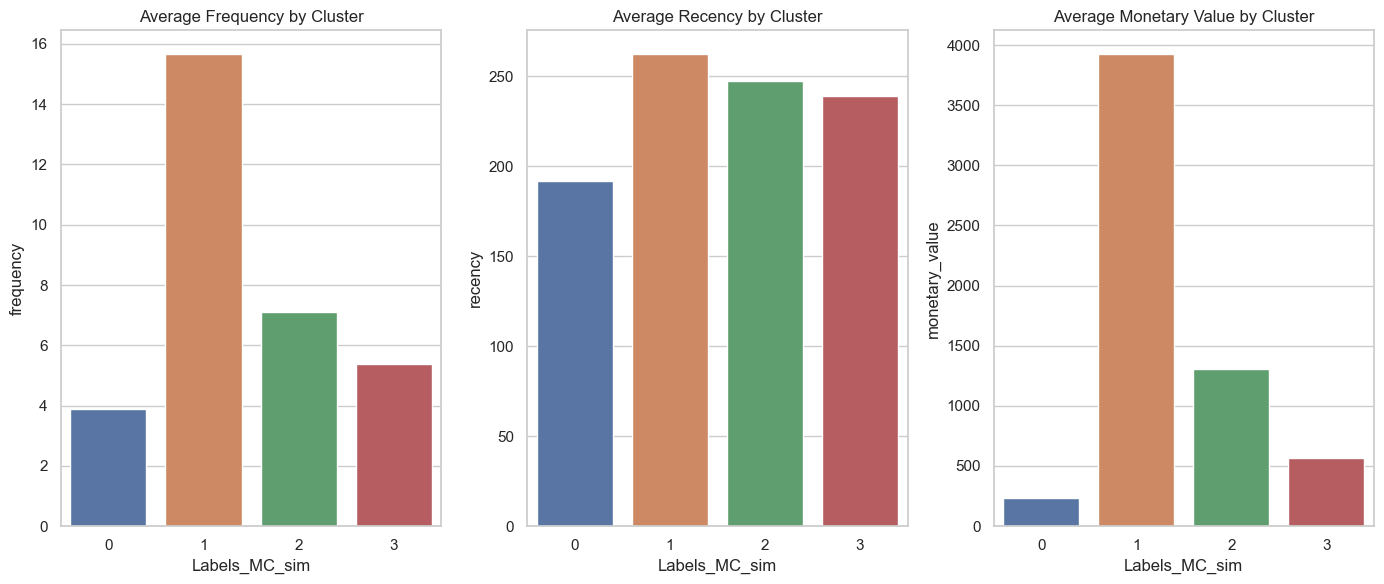

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a bar plot for the average frequency, recency, and monetary value of each cluster
plt.figure(figsize=(14, 6))

# Plotting frequency
plt.subplot(1, 3, 1)
sns.barplot(x=cluster_characteristics.index, y='frequency', data=cluster_characteristics)
plt.title('Average Frequency by Cluster')

# Plotting recency
plt.subplot(1, 3, 2)
sns.barplot(x=cluster_characteristics.index, y='recency', data=cluster_characteristics)
plt.title('Average Recency by Cluster')

# Plotting monetary value
plt.subplot(1, 3, 3)
sns.barplot(x=cluster_characteristics.index, y='monetary_value', data=cluster_characteristics)
plt.title('Average Monetary Value by Cluster')

plt.tight_layout()
plt.show()

## Label Characteristics based on the visualizations:

*Label 0* customers have a moderate frequency and recency of purchases with lower monetary value. They could represent occasional shoppers who spend less.

*Label 1* customers have the highest frequency and monetary value, indicating they are likely to be premium customers with consistent and high-value purchases.

*Label 2* customers have an above-moderate frequency and high monetary value, suggesting they are valuable customers with significant spending but less frequent purchases than Label 1.

*Label 3* customers have moderate values across frequency, recency, and monetary value, which might indicate regular customers with average spending habits.


## For marketing targeting:

*Label 1* should be the primary focus due to their high spending and frequent purchases. Personalized and exclusive offers could increase their loyalty and spending.

*Label 2* also represents an important segment due to their high spending, even though they shop less frequently. Encouraging more frequent visits through targeted promotions could be beneficial.

*Label 0* and *Label 3* could be targeted with strategies aimed at increasing their purchase frequency and value, such as through cross-selling and upselling opportunities.

In [18]:
fg=kmeans_on_mc_df[['mc_predicted_purchases','Labels_MC_sim']]

In [19]:
fg.to_csv('kmeans_on_mc_df.csv', index=True)

In [20]:
kmeans_on_mc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2598 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   frequency               2598 non-null   float64
 1   recency                 2598 non-null   float64
 2   T                       2598 non-null   float64
 3   monetary_value          2598 non-null   float64
 4   p_alive                 2598 non-null   float64
 5   Expected_Avg_Sales      2598 non-null   float64
 6   mc_predicted_purchases  2598 non-null   float64
 7   Labels_MC_sim           2598 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 172.5 KB
